In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [2]:
#create reference to csv file
days_to_pend = pd.read_csv("Resources/AverageDaystoPending.csv")
num_new_properties = pd.read_csv("Resources/MonthlyNumberofNewListings.csv")
price_cuts = pd.read_csv("Resources/AverageNumberofPropertieswithPriceCut.csv")

In [3]:
#narrow down results to 5 cities
days_to_pending = days_to_pend[(days_to_pend['RegionName'] == 'Philadelphia, PA') | (days_to_pend['RegionName'] == 'Phoenix, AZ') | (days_to_pend['RegionName'] == 'San Antonio, TX') \
                               | (days_to_pend['RegionName'] == 'San Diego, CA') | (days_to_pend['RegionName'] == 'Dallas, TX')]

num_new_prop = num_new_properties[(num_new_properties['RegionName'] == 'Philadelphia, PA') | (num_new_properties['RegionName'] == 'Phoenix, AZ') | (num_new_properties['RegionName'] == 'San Antonio, TX') \
                               | (num_new_properties['RegionName'] == 'San Diego, CA') | (num_new_properties['RegionName'] == 'Dallas, TX')]

price_cut = price_cuts[(price_cuts['RegionName'] == 'Philadelphia, PA') | (price_cuts['RegionName'] == 'Phoenix, AZ') | (price_cuts['RegionName'] == 'San Antonio, TX') \
                               | (price_cuts['RegionName'] == 'San Diego, CA') | (price_cuts['RegionName'] == 'Dallas, TX')]


In [5]:
# days_to_pending.columns.values.tolist()

In [4]:
#reduce number of columns in each dataframe
days_pending = pd.DataFrame(days_to_pending[["RegionName",
                                             "2018-04-30",
                                             "2018-09-30",
                                             "2019-04-30",
                                             "2019-09-30",
                                             "2020-04-30",
                                             "2020-09-30",
                                             "2021-04-30",
                                             "2021-09-30",
                                             "2022-04-30",
                                            "2022-09-30"]])

num_of_new_prop = pd.DataFrame(num_new_prop[["RegionName",
                                            "2018-04-30",
                                             "2018-09-30",
                                             "2019-04-30",
                                             "2019-09-30",
                                             "2020-04-30",
                                             "2020-09-30",
                                             "2021-04-30",
                                             "2021-09-30",
                                             "2022-04-30",
                                            "2022-09-30"]])

prices_cuts = pd.DataFrame(price_cut[["RegionName",
                                            "2018-04-30",
                                             "2018-09-30",
                                             "2019-04-30",
                                             "2019-09-30",
                                             "2020-04-30",
                                             "2020-09-30",
                                             "2021-04-30",
                                             "2021-09-30",
                                             "2022-04-30",
                                            "2022-09-30"]])


In [5]:
days_pending.rename(columns = {'2018-04-30':'dp_April_2018',
                               '2018-09-30':'dp_Sept_2018',
                               '2019-04-30':'dp_April_2019',
                               '2019-09-30':'dp_Sept_2019',
                               '2020-04-30':'dp_April_2020',
                               '2020-09-30':'dp_Sept_2020',
                               '2021-04-30':'dp_April_2021',
                               '2021-09-30':'dp_Sept_2021',
                               '2022-04-30':'dp_April_2022',
                               '2022-09-30':'dp_Sept_2022'}, inplace=True)

num_of_new_prop.rename(columns = {'2018-04-30':'nnp_April_2018',
                               '2018-09-30':'nnp_Sept_2018',
                               '2019-04-30':'nnp_April_2019',
                               '2019-09-30':'nnp_Sept_2019',
                               '2020-04-30':'nnp_April_2020',
                               '2020-09-30':'nnp_Sept_2020',
                               '2021-04-30':'nnp_April_2021',
                               '2021-09-30':'nnp_Sept_2021',
                               '2022-04-30':'nnp_April_2022',
                               '2022-09-30':'nnp_Sept_2022'}, inplace=True)


prices_cuts.rename(columns = {'2018-04-30':'pc_April_2018',
                               '2018-09-30':'pc_Sept_2018',
                               '2019-04-30':'pc_April_2019',
                               '2019-09-30':'pc_Sept_2019',
                               '2020-04-30':'pc_April_2020',
                               '2020-09-30':'pc_Sept_2020',
                               '2021-04-30':'pc_April_2021',
                               '2021-09-30':'pc_Sept_2021',
                               '2022-04-30':'pc_April_2022',
                               '2022-09-30':'pc_Sept_2022'}, inplace=True)

prices_cuts.head()


,RegionName,pc_April_2018,pc_Sept_2018,pc_April_2019,pc_Sept_2019,pc_April_2020,pc_Sept_2020,pc_April_2021,pc_Sept_2021,pc_April_2022,pc_Sept_2022
4,"Dallas, TX",9513.500000,6666.666667,6800.000000,6300.000000,6299.833333,8200.000000,10000.333333,10034.333333,10333.333333,11366.666667
8,"Philadelphia, PA",7083.333333,9000.000000,8133.333333,9609.000000,8966.666667,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
10,"Phoenix, AZ",5033.666667,5000.000000,5000.000000,5000.000000,7366.666667,9000.000000,11833.333333,11000.333333,11366.666667,11994.166667
17,"San Diego, CA",18650.000000,15336.666667,15333.000000,16366.666667,18666.666667,22300.333333,30033.333333,25366.666667,43833.333333,27333.333333
24,"San Antonio, TX",5233.333333,5433.333333,5033.333333,5033.333333,5200.333333,5933.500000,NaN,10000.000000,10000.000000,10000.000000


In [6]:
df_merge_one = pd.merge(days_pending, prices_cuts, on = "RegionName", how = "inner")
df_merge_one.head()


,RegionName,dp_April_2018,dp_Sept_2018,dp_April_2019,dp_Sept_2019,dp_April_2020,dp_Sept_2020,dp_April_2021,dp_Sept_2021,dp_April_2022,...,pc_April_2018,pc_Sept_2018,pc_April_2019,pc_Sept_2019,pc_April_2020,pc_Sept_2020,pc_April_2021,pc_Sept_2021,pc_April_2022,pc_Sept_2022
0,"Dallas, TX",21.0,28.0,28.0,33.0,28.0,23.0,15.0,16.0,8.0,...,9513.500000,6666.666667,6800.000000,6300.000000,6299.833333,8200.000000,10000.333333,10034.333333,10333.333333,11366.666667
1,"Philadelphia, PA",33.0,27.0,20.0,23.0,16.0,12.0,7.0,10.0,7.0,...,7083.333333,9000.000000,8133.333333,9609.000000,8966.666667,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2,"Phoenix, AZ",25.0,25.0,27.0,21.0,15.0,10.0,7.0,10.0,7.0,...,5033.666667,5000.000000,5000.000000,5000.000000,7366.666667,9000.000000,11833.333333,11000.333333,11366.666667,11994.166667
3,"San Diego, CA",14.0,28.0,24.0,24.0,17.0,8.0,7.0,9.0,7.0,...,18650.000000,15336.666667,15333.000000,16366.666667,18666.666667,22300.333333,30033.333333,25366.666667,43833.333333,27333.333333
4,"San Antonio, TX",32.0,35.0,35.0,39.0,35.0,26.0,6.0,7.0,6.0,...,5233.333333,5433.333333,5033.333333,5033.333333,5200.333333,5933.500000,NaN,10000.000000,10000.000000,10000.000000


In [7]:
df_merged = pd.merge(df_merge_one, num_of_new_prop, on = "RegionName", how = "inner")
df_merged.head()

,RegionName,dp_April_2018,dp_Sept_2018,dp_April_2019,dp_Sept_2019,dp_April_2020,dp_Sept_2020,dp_April_2021,dp_Sept_2021,dp_April_2022,...,nnp_April_2018,nnp_Sept_2018,nnp_April_2019,nnp_Sept_2019,nnp_April_2020,nnp_Sept_2020,nnp_April_2021,nnp_Sept_2021,nnp_April_2022,nnp_Sept_2022
0,"Dallas, TX",21.0,28.0,28.0,33.0,28.0,23.0,15.0,16.0,8.0,...,10075.0,10225.0,10334.0,9878.0,9009.0,10099.0,9100.0,11332.0,8689.0,9590.0
1,"Philadelphia, PA",33.0,27.0,20.0,23.0,16.0,12.0,7.0,10.0,7.0,...,8434.0,7391.0,8326.0,7223.0,5622.0,8432.0,7695.0,8765.0,7402.0,6704.0
2,"Phoenix, AZ",25.0,25.0,27.0,21.0,15.0,10.0,7.0,10.0,7.0,...,9152.0,7621.0,8355.0,7243.0,7689.0,8422.0,8397.0,8756.0,8174.0,8070.0
3,"San Diego, CA",14.0,28.0,24.0,24.0,17.0,8.0,7.0,9.0,7.0,...,3527.0,3615.0,3369.0,3272.0,2787.0,3636.0,3317.0,3626.0,3153.0,2717.0
4,"San Antonio, TX",32.0,35.0,35.0,39.0,35.0,26.0,6.0,7.0,6.0,...,3060.0,2839.0,3103.0,2984.0,2723.0,3041.0,2771.0,3770.0,3079.0,3460.0


In [8]:
df_merged.set_index("RegionName", inplace=True)
df_merged.head()

,dp_April_2018,dp_Sept_2018,dp_April_2019,dp_Sept_2019,dp_April_2020,dp_Sept_2020,dp_April_2021,dp_Sept_2021,dp_April_2022,dp_Sept_2022,...,nnp_April_2018,nnp_Sept_2018,nnp_April_2019,nnp_Sept_2019,nnp_April_2020,nnp_Sept_2020,nnp_April_2021,nnp_Sept_2021,nnp_April_2022,nnp_Sept_2022
RegionName,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",21.0,28.0,28.0,33.0,28.0,23.0,15.0,16.0,8.0,13.0,...,10075.0,10225.0,10334.0,9878.0,9009.0,10099.0,9100.0,11332.0,8689.0,9590.0
"Philadelphia, PA",33.0,27.0,20.0,23.0,16.0,12.0,7.0,10.0,7.0,11.0,...,8434.0,7391.0,8326.0,7223.0,5622.0,8432.0,7695.0,8765.0,7402.0,6704.0
"Phoenix, AZ",25.0,25.0,27.0,21.0,15.0,10.0,7.0,10.0,7.0,28.0,...,9152.0,7621.0,8355.0,7243.0,7689.0,8422.0,8397.0,8756.0,8174.0,8070.0
"San Diego, CA",14.0,28.0,24.0,24.0,17.0,8.0,7.0,9.0,7.0,19.0,...,3527.0,3615.0,3369.0,3272.0,2787.0,3636.0,3317.0,3626.0,3153.0,2717.0
"San Antonio, TX",32.0,35.0,35.0,39.0,35.0,26.0,6.0,7.0,6.0,15.0,...,3060.0,2839.0,3103.0,2984.0,2723.0,3041.0,2771.0,3770.0,3079.0,3460.0


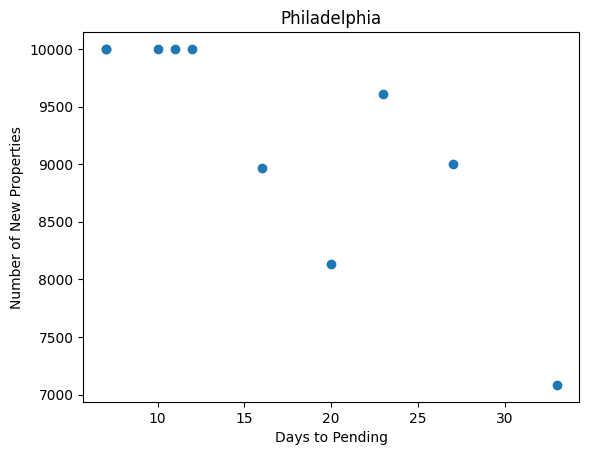

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for correlation
# dp 2018 = 0

plt.scatter(df_merged.iloc[1,0:10],df_merged.iloc[1,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('Philadelphia')
# Show plot
plt.show()
plt.savefig("output_data/phila_DaysPending_vs_NumberProperties.png")

In [11]:
rvalue, pvalue = pearsonr(df_merged.iloc[1,0:10],df_merged.iloc[1,10:20])
print("Philadelphia")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

Philadelphia
The rvalue is -0.8304117116279692.
The p-value is 0.0029331097166108377.


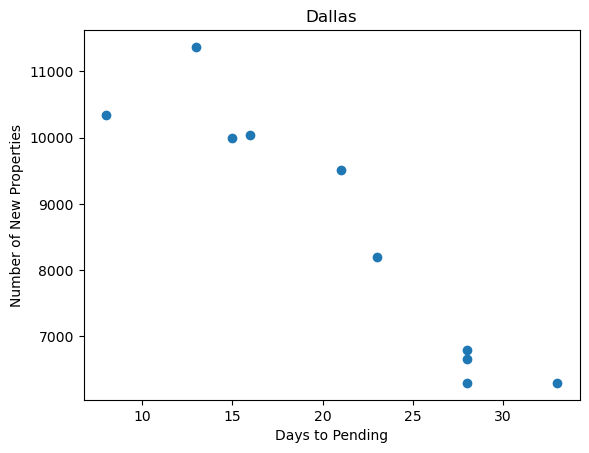

<Figure size 640x480 with 0 Axes>

In [46]:
plt.scatter(df_merged.iloc[0,0:10],df_merged.iloc[0,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('Dallas')
# Show plot
plt.show()
plt.savefig("output_data/dallas_DaysPending_vs_NumberProperties.png")

In [12]:
rvalue, pvalue = pearsonr(df_merged.iloc[0,0:10],df_merged.iloc[0,10:20])
print("Dallas")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

Dallas
The rvalue is -0.9354807987965801.
The p-value is 7.009810169594656e-05.


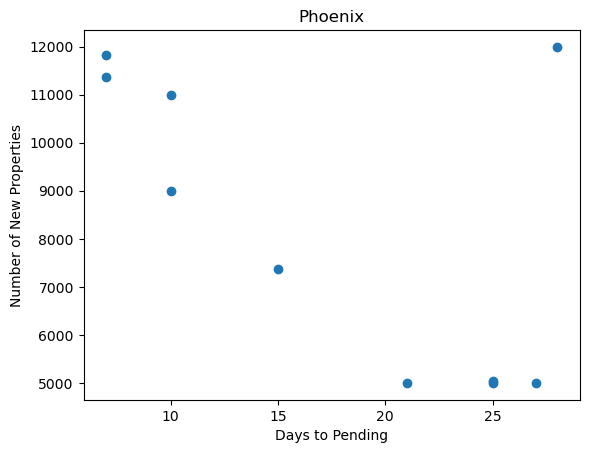

<Figure size 640x480 with 0 Axes>

In [47]:
plt.scatter(df_merged.iloc[2,0:10],df_merged.iloc[2,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('Phoenix')
# Show plot
plt.show()
plt.savefig("output_data/phoenix_DaysPending_vs_NumberProperties.png")

In [13]:
rvalue, pvalue = pearsonr(df_merged.iloc[2,0:10],df_merged.iloc[2,10:20])
print("Phoenix")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

Phoenix
The rvalue is -0.6047298365240714.
The p-value is 0.06401168376649471.


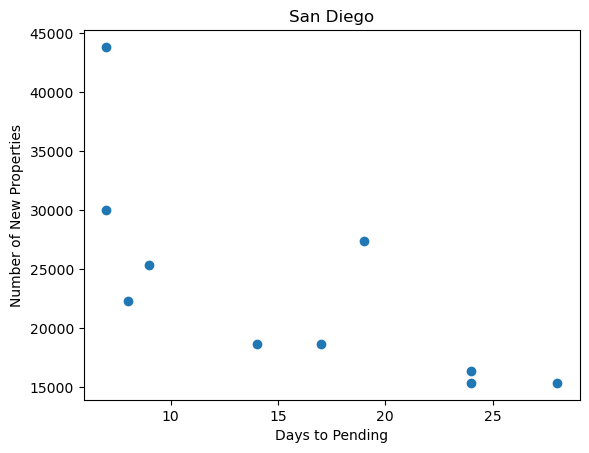

<Figure size 640x480 with 0 Axes>

In [48]:
plt.scatter(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('San Diego')
# Show plot
plt.show()
plt.savefig("output_data/sandiego_DaysPending_vs_NumberProperties.png")

In [14]:
rvalue, pvalue = pearsonr(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
print("San Diego")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

San Diego
The rvalue is -0.715020066315328.
The p-value is 0.02011194465967621.


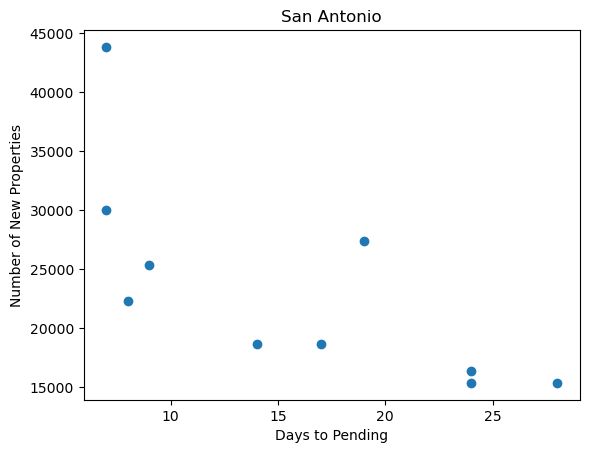

<Figure size 640x480 with 0 Axes>

In [49]:
plt.scatter(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('San Antonio')
# Show plot
plt.show()
plt.savefig("output_data/sanantonio_DaysPending_vs_NumberProperties.png")

In [15]:
rvalue, pvalue = pearsonr(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
print("San Antonio")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

San Antonio
The rvalue is -0.715020066315328.
The p-value is 0.02011194465967621.
